In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


we have 891 rows and 12 columns 

In [3]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are missing values from the age and Cabin column

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# seperate the data into numeric and categorical
df_num = data[['Age','SibSp','Parch','Fare']]
df_cat = data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [8]:
#since cabin has lot of missing values, dropping the column

drop_column = ['Cabin', 'Name', 'Ticket']
data.drop(drop_column, axis=1, inplace = True)

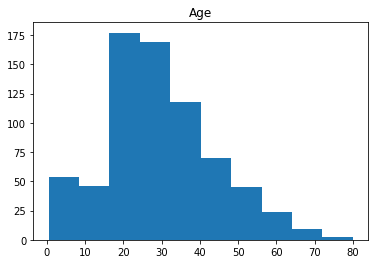

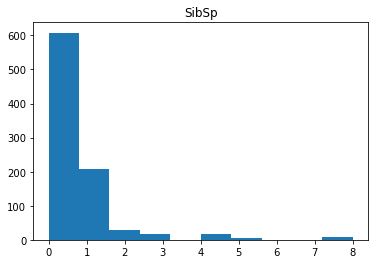

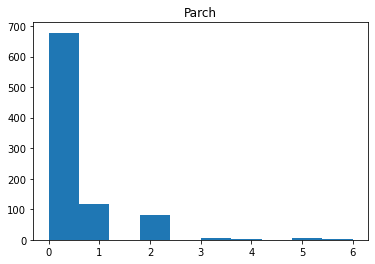

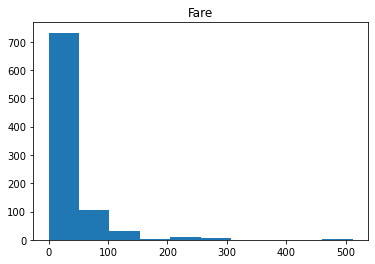

In [9]:
# plotting the graph for numeric data
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

Most of the distributions are scattered, except Age, it’s pretty normalized. plotting a correlation heatmap between the numeric columns:

<AxesSubplot:>

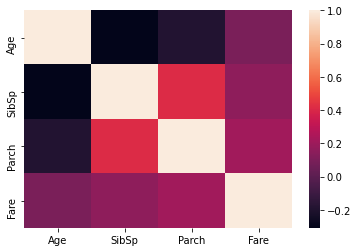

In [10]:
sns.heatmap(df_num.corr())

Here we can see that Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to travel with their multiple kids and spouses tend to travel together.Now, comparing survival rates across the numeric variables. 

In [11]:
pd.pivot_table(data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


we conclude that 
1. The average age of survivors is 28, so young people tend to survive more.
2. People who paid higher fare rates were more likely to survive
3. In the 3rd column, If you have parents, you had a higher chance of surviving.
4. if child, and have siblings, you have less of a chance of surviving



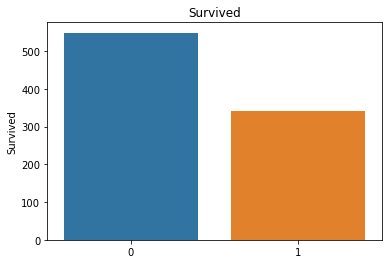

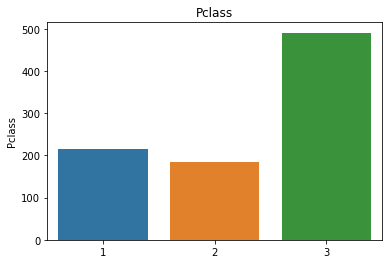

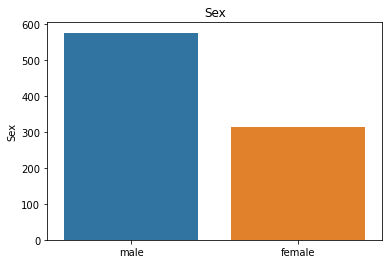

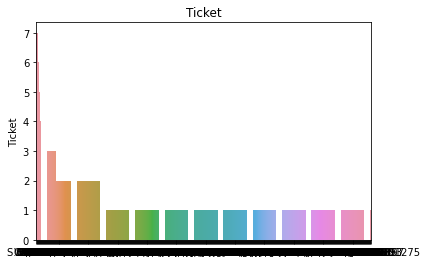

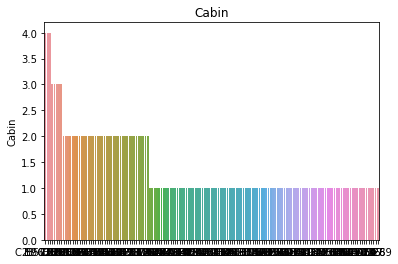

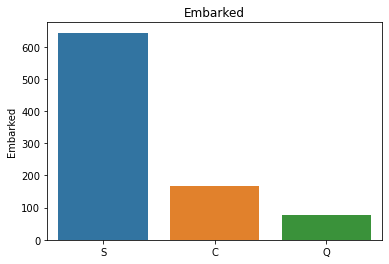

In [12]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

Since the graphs looks messy, we will do feature engineering later

In [13]:
# filling the missing values on Age column
data['Age'].fillna(data['Age'].median(), inplace = True)

In [14]:
print('check the nan value in train data')
print(data.isnull().sum())

check the nan value in train data
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64


In [15]:
# filling the missing values of embarked column
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

In [16]:
print('check the nan value in train data')
print(data.isnull().sum())

check the nan value in train data
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


All the missing values are now removed



Doing Feature Engineering now:

In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

le=LabelEncoder()
data.Sex=le.fit_transform(data.Sex)
data.Embarked=le.fit_transform(data.Embarked)

In [18]:
#seaparting the data into train test split

x= data.drop(['Survived'], axis = 1)
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2


In [19]:
y = data[['Survived']]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [20]:
#for split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [21]:
print (data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [22]:
print (data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

   Sex  Survived
0    0  0.742038
1    1  0.188908


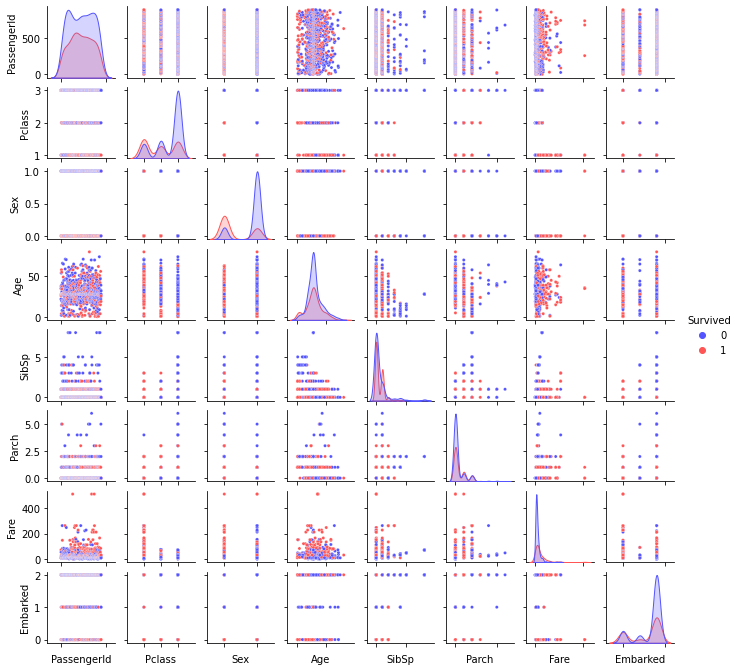

In [23]:
# generating pairplots to observe the distribution of data from one feature to the other.

g = sns.pairplot(data, hue='Survived', palette = 'seismic',
                 size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

<b> Model building </b>

In [24]:
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix

In [25]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[-1.73010796,  0.82737724,  0.73769513, ..., -0.47367361,
        -0.50244517,  0.58595414],
       [-1.72622007, -1.56610693, -1.35557354, ..., -0.47367361,
         0.78684529, -1.9423032 ],
       [-1.72233219,  0.82737724, -1.35557354, ..., -0.47367361,
        -0.48885426,  0.58595414],
       ...,
       [ 1.72233219,  0.82737724, -1.35557354, ...,  2.00893337,
        -0.17626324,  0.58595414],
       [ 1.72622007, -1.56610693,  0.73769513, ..., -0.47367361,
        -0.04438104, -1.9423032 ],
       [ 1.73010796,  0.82737724,  0.73769513, ..., -0.47367361,
        -0.49237783, -0.67817453]])

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 8), (268, 8), (623, 1), (268, 1))

<b> Logistic Regression </b>

In [27]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction_lr=lr.predict(X_test)

print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))

print('\nclassification report:\n\n',classification_report(y_test,prediction_lr))
print('confusioon matrix:\n',confusion_matrix(y_test,prediction_lr))

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 77.24

classification report:

               precision    recall  f1-score   support

           0       0.77      0.88      0.82       159
           1       0.78      0.61      0.69       109

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268

confusioon matrix:
 [[140  19]
 [ 42  67]]


<b> Random Forest Classifier </b>

In [28]:
from sklearn.ensemble import RandomForestClassifier
#rfc = RandomForestClassifier(criterion='gini', n_estimators=700,
                             #min_samples_split=10,min_samples_leaf=1,
                             #max_features='auto',oob_score=True,
                             #random_state=1,n_jobs=-1)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
prediction_rm=rfc.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(prediction_rm,y_test)*100,2))


print('\nclassification report:\n\n',classification_report(y_test,prediction_lr))
print('confusioon matrix:\n',confusion_matrix(y_test,prediction_lr))

--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 83.96

classification report:

               precision    recall  f1-score   support

           0       0.77      0.88      0.82       159
           1       0.78      0.61      0.69       109

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268

confusioon matrix:
 [[140  19]
 [ 42  67]]


<b>Support Vector Machines</b>

In [29]:
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC

svc = SVC()
svc.fit(X_train,y_train)
prediction_svm=svc.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Support Vector Machines Classifier is',round(accuracy_score(prediction_svm,y_test)*100,2))

print('\nclassification report:\n\n',classification_report(y_test,prediction_lr))
print('confusioon matrix:\n',confusion_matrix(y_test,prediction_lr))

--------------The Accuracy of the model----------------------------
The accuracy of the Support Vector Machines Classifier is 63.06

classification report:

               precision    recall  f1-score   support

           0       0.77      0.88      0.82       159
           1       0.78      0.61      0.69       109

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268

confusioon matrix:
 [[140  19]
 [ 42  67]]


In [30]:
from sklearn.neighbors import KNeighborsClassifier


#knn = KNeighborsClassifier(n_neighbors = 4)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
prediction_knn=knn.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the K Nearst Neighbors Classifier is',round(accuracy_score(prediction_knn,y_test)*100,2))

print('\nclassification report:\n\n',classification_report(y_test,prediction_lr))
print('confusioon matrix:\n',confusion_matrix(y_test,prediction_lr))

--------------The Accuracy of the model----------------------------
The accuracy of the K Nearst Neighbors Classifier is 64.18

classification report:

               precision    recall  f1-score   support

           0       0.77      0.88      0.82       159
           1       0.78      0.61      0.69       109

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268

confusioon matrix:
 [[140  19]
 [ 42  67]]


In [31]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
prediction_gnb=gnb.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_gnb,y_test)*100,2))

print('\nclassification report:\n\n',classification_report(y_test,prediction_lr))
print('confusioon matrix:\n',confusion_matrix(y_test,prediction_lr))

--------------The Accuracy of the model----------------------------
The accuracy of the Gaussian Naive Bayes Classifier is 78.73

classification report:

               precision    recall  f1-score   support

           0       0.77      0.88      0.82       159
           1       0.78      0.61      0.69       109

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268

confusioon matrix:
 [[140  19]
 [ 42  67]]


In [32]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
#dtc = DecisionTreeClassifier(criterion='gini', 
 #                            min_samples_split=10,min_samples_leaf=1,
  #                           max_features='auto')
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
prediction_tree=dtc.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the DecisionTree Classifier is',round(accuracy_score(prediction_tree,y_test)*100,2))

print('\nclassification report:\n\n',classification_report(y_test,prediction_lr))
print('confusioon matrix:\n',confusion_matrix(y_test,prediction_lr))

--------------The Accuracy of the model----------------------------
The accuracy of the DecisionTree Classifier is 75.0

classification report:

               precision    recall  f1-score   support

           0       0.77      0.88      0.82       159
           1       0.78      0.61      0.69       109

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268

confusioon matrix:
 [[140  19]
 [ 42  67]]


In [33]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier()
adc.fit(X_train,y_train)
prediction_adb=adc.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the AdaBoostClassifier is',round(accuracy_score(prediction_adb,y_test)*100,2))

print('\nclassification report:\n\n',classification_report(y_test,prediction_lr))
print('confusioon matrix:\n',confusion_matrix(y_test,prediction_lr))

--------------The Accuracy of the model----------------------------
The accuracy of the AdaBoostClassifier is 79.85

classification report:

               precision    recall  f1-score   support

           0       0.77      0.88      0.82       159
           1       0.78      0.61      0.69       109

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268

confusioon matrix:
 [[140  19]
 [ 42  67]]


In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier()
gbc.fit(X_train,y_train)
prediction_gbc=gbc.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(prediction_gbc,y_test)*100,2))

print('\nclassification report:\n\n',classification_report(y_test,prediction_lr))
print('confusioon matrix:\n',confusion_matrix(y_test,prediction_lr))

--------------The Accuracy of the model----------------------------
The accuracy of the Gradient Boosting Classifier is 80.22

classification report:

               precision    recall  f1-score   support

           0       0.77      0.88      0.82       159
           1       0.78      0.61      0.69       109

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268

confusioon matrix:
 [[140  19]
 [ 42  67]]


<b> Applying cross validation technique </b>

In [36]:
# try to improve accuracy through cross validation  
model=[lr,rfc,svc,knn,gnb,dtc,adc,gbc] #scaled for other models for cross validation
for i in model:
    scr_=cross_val_score(i,x_scaled,y,cv=15)
    print(i)
    print('cross validation score:',scr_.mean(),'\n')
    

LogisticRegression()
cross validation score: 0.795743879472693 

RandomForestClassifier()
cross validation score: 0.8217325800376649 

SVC()
cross validation score: 0.8136534839924671 

KNeighborsClassifier()
cross validation score: 0.7901129943502826 

GaussianNB()
cross validation score: 0.7857062146892656 

DecisionTreeClassifier()
cross validation score: 0.7265536723163843 

AdaBoostClassifier()
cross validation score: 0.7793032015065913 

GradientBoostingClassifier()
cross validation score: 0.7906026365348399 



<b> roc auc plot</b>

In [37]:

# testing all models
lr.score(X_test,y_test)
dtc.score(X_test,y_test)
knn.score(X_test,y_test)
svc.score(X_test,y_test)
rfc.score(X_test,y_test)
#gnb.score(X_test,y_test)
adc.score(X_test,y_test)
#lda.score(X_test,y_test)
gbc.score(X_test,y_test)
print('all model test score captured')

all model test score captured


In [38]:
# Library for metrics
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

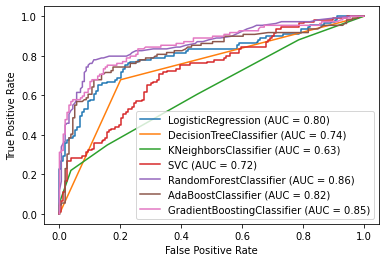

In [39]:
# comparing models
disp=plot_roc_curve(lr,X_test,y_test)
plot_roc_curve(dtc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,X_test,y_test,ax=disp.ax_)
#plot_roc_curve(gnb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(adc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,X_test,y_test,ax=disp.ax_)
#plot_roc_curve(lda,X_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()


<b> Hyperparameter Tuning </b>

In [40]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

# GussianNB has the least differnce  
#hyperparameter tuning for GussianNB
parameters= {'var_smoothing': np.logspace(0,-9, num=100)}

gs=GridSearchCV(gnb,parameters)
gs.fit(X_train,y_train)
print('\n gnb Tuning')
print('best estimators:\n',gs.best_estimator_)

 # applying best estimators
new_model=gs.best_estimator_ 
new_model.fit(X_train,y_train)
pred=new_model.predict(X_test)
print('\n\naccuracy score:',accuracy_score(y_test,pred))
print('\nconfusion_matrix:\n',confusion_matrix(y_test,pred))
print('\nclassification_report:\n',pd.DataFrame(classification_report(y_test,pred,output_dict=True)))


 gnb Tuning
best estimators:
 GaussianNB(var_smoothing=8.111308307896856e-09)


accuracy score: 0.7873134328358209

confusion_matrix:
 [[134  25]
 [ 32  77]]

classification_report:
                     0           1  accuracy   macro avg  weighted avg
precision    0.807229    0.754902  0.787313    0.781065      0.785947
recall       0.842767    0.706422  0.787313    0.774595      0.787313
f1-score     0.824615    0.729858  0.787313    0.777237      0.786076
support    159.000000  109.000000  0.787313  268.000000    268.000000


In [43]:
#RandomForestClassifier has the maximum area

parameters={'n_estimators':[5,12,17,19], 
    'criterion':['entropy','gini'],
    'max_depth':[8],
    'min_samples_split':[7,8],
    'min_samples_leaf':[4,5]}

gs=GridSearchCV(rfc,parameters)
gs.fit(X_train,y_train)
print('\n RandomForestClassifier Tuning')
print('best estimators:\n',gs.best_estimator_)

# Applying best estimator
my_model=gs.best_estimator_ 
my_model.fit(X_train,y_train)
pred=my_model.predict(X_test)
print('\n\naccuracy score:',accuracy_score(y_test,pred))
print('\nconfusion_matrix:\n',confusion_matrix(y_test,pred))
print('\nclassification_report:\n',pd.DataFrame(classification_report(y_test,pred,output_dict=True)))



 RandomForestClassifier Tuning
best estimators:
 RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=17)


accuracy score: 0.8022388059701493

confusion_matrix:
 [[146  13]
 [ 40  69]]

classification_report:
                     0           1  accuracy   macro avg  weighted avg
precision    0.784946    0.841463  0.802239    0.813205      0.807933
recall       0.918239    0.633028  0.802239    0.775633      0.802239
f1-score     0.846377    0.722513  0.802239    0.784445      0.795999
support    159.000000  109.000000  0.802239  268.000000    268.000000


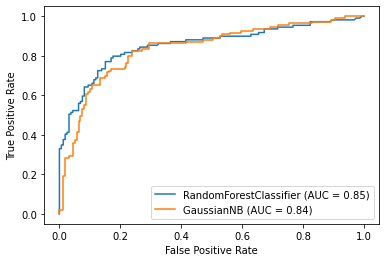

In [44]:
disp=plot_roc_curve(my_model,X_test,y_test)
plot_roc_curve(new_model,X_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [45]:
#saving the final model
import pickle
filename='Titanic.pkl'
pickle.dump(my_model,open(filename,'wb'))